explode() is also used for cleaning the data

In [20]:
'''
lets say for eg i have 2 cols:
    job_title_short           job_skills
0   data analyst               [excel,sql,python]
1   data scientist             [python,r]
2   data eng                   [aws,python,c]

if we want to count up the number of times python or excel appears its going to be difficult as its in list format
what explode does is:
df.explode('job_skills').value_counts('job_skills')
wht this does is it will explode it out to every single value of that list into individual row

    job_title_short           job_skills
0   data analyst               excel
0   data analyst               sql
0   data analyst               python
1   data scientist             python
1   data scientist             r
2   data eng                   aws
2   data eng                   python
2   data eng                   c

now we can easily calculate the counts of each 
'''


"\nlets say for eg i have 2 cols:\n    job_title_short           job_skills\n0   data analyst               [excel,sql,python]\n1   data scientist             [python,r]\n2   data eng                   [aws,python,c]\n\nif we want to count up the number of times python or excel appears its going to be difficult as its in list format\nwhat explode does is:\ndf.explode('job_skills').value_counts('job_skills')\nwht this does is it will explode it out to every single value of that list into individual row\n\n    job_title_short           job_skills\n0   data analyst               excel\n0   data analyst               sql\n0   data analyst               python\n1   data scientist             python\n1   data scientist             r\n2   data eng                   aws\n2   data eng                   python\n2   data eng                   c\n\nnow we can easily calculate the counts of each \n"

In [21]:
#import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

#load the data
dataset=load_dataset('lukebarousse/data_jobs')
#convert dataset into df
df=dataset['train'].to_pandas()

#data cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])

#we are cleaning up another col with the help of apply() method
#just what we did in our previous eg we saw job_skills was messed up
#value were of string dtype so we converted it into list by importing the ast.literal_eval()
#x are the values in the job_skills col
#def tolist(x):
    #if x is not empty then only convert
    #if pd.notna(x):
        #return ast.literal_eval(x)
#now apply this function to all the values present in the job_skills col so that the dtype gets converted from string to list
#so we will access the job_skills col and put the apply() method
#df['job_skills']=df['job_skills'].apply(tolist)

#we can write all this in one line also with the help of lambda
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [22]:
#now we are accessing 2 col from our dataframe and getting the top 5 values
df[['job_title_short','job_skills']].head(5)

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


In [23]:
#lets use the explode() method and convert the list of values into individual row
#df mein explode method use kari hoon on the job_skills col and assign it to a new dataframe
df_explode=df.explode('job_skills')
df_explode

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kafka,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kubernetes,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,docker,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785740,Software Engineer,AWS System Analyst,India,melalui Trigyn,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Trigyn,aws,"{'cloud': ['aws'], 'other': ['flow']}"


In [24]:
#now we can access the job_skills col from our new df and apply the value_counts method (as values got converted to individual row)
#df_explode['job_skills'].value_counts()

In [25]:
#lets just access the top 10 values and visualise it using bar graph
#df_explode['job_skills'].value_counts().head(10).plot(kind='bar')

In [26]:
#group together" all rows that have the exact same combination of skills AND job title.
#same skills and same job_title ko saath mein grp karo and store it in a variable
skills_count=df_explode.groupby(['job_skills','job_title_short']).size()

In [ ]:
#now this skills_count has become a series as groupby.size() converts it into series
type(skills_count)

pandas.core.series.Series

In [28]:
#we need to convert this into a dataframe so well use the reset_index()method and create a new df
df_skills_count=skills_count.reset_index()
df_skills_count

,job_skills,job_title_short,0
0,airflow,Business Analyst,318
1,airflow,Cloud Engineer,260
2,airflow,Data Analyst,2002
3,airflow,Data Engineer,25505
4,airflow,Data Scientist,3915
...,...,...,...
2251,zoom,Machine Learning Engineer,46
2252,zoom,Senior Data Analyst,86
2253,zoom,Senior Data Engineer,122
2254,zoom,Senior Data Scientist,79


In [32]:
#but here we see that a new col was added with header 0 therefore change the header
df_skills_count=skills_count.reset_index(name='skill_count')
#now we need to sort these values and by which col well sort it , by the skill_count
df_skills_count=df_skills_count.sort_values(by='skill_count',ascending=False)
df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


In [33]:
#now well get the top 10 skills of a data analyst
job_title='Data Analyst'

#create a new df and access the job_title_short col from the df_skills_count df
#if the job_title_Short==job_title that we want then give me the top 10 values
df_skill_final=df_skills_count[df_skills_count['job_title_short']==job_title].head(10)
df_skill_final

,job_skills,job_title_short,skill_count
1821,sql,Data Analyst,92428
558,excel,Data Analyst,66860
1478,python,Data Analyst,57190
1941,tableau,Data Analyst,46455
1410,power bi,Data Analyst,39380
1516,r,Data Analyst,29996
1635,sas,Data Analyst,27998
1429,powerpoint,Data Analyst,13822
2198,word,Data Analyst,13562
1625,sap,Data Analyst,11280


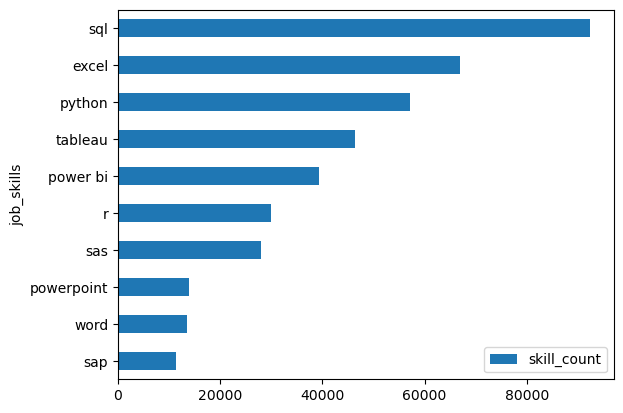

In [35]:
df_skill_final.plot(kind='barh',x='job_skills',y='skill_count')
#to invert the yaxis call the pyplot module and run the gca method on it
plt.gca().invert_yaxis()

In [30]:
''' 
Imagine you have a list of job titles. It might look like this:

Data Scientist
Data Engineer
Data Scientist
Business Analyst
Data Engineer
Data Engineer

The line of code df_explode.groupby(['job_title_short']).size() does one simple thing: It counts how many times each job title appears.

Step-by-Step Walkthrough:
->df_explode: This is just the name of your table (your DataFrame).
->.groupby(['job_title_short']): This means "group together" all the rows that have the same job title.
->It puts all "Data Scientist" rows into one group.
->All "Data Engineer" rows into another group.
->All "Business Analyst" rows into a third group.
->.size(): This is the action you perform on each group. It simply counts the number of rows in each group.
'''

' \nImagine you have a list of job titles. It might look like this:\n\nData Scientist\nData Engineer\nData Scientist\nBusiness Analyst\nData Engineer\nData Engineer\n\nThe line of code df_explode.groupby([\'job_title_short\']).size() does one simple thing: It counts how many times each job title appears.\n\nStep-by-Step Walkthrough:\n->df_explode: This is just the name of your table (your DataFrame).\n->.groupby([\'job_title_short\']): This means "group together" all the rows that have the same job title.\n->It puts all "Data Scientist" rows into one group.\n->All "Data Engineer" rows into another group.\n->All "Business Analyst" rows into a third group.\n->.size(): This is the action you perform on each group. It simply counts the number of rows in each group.\n'

In [31]:
''' 
df_explode.groupby(['job_skills','job_title_short']).size()
.groupby(['job_skills','job_skills']): This means "group together" all rows that have the exact same combination of skills AND job title.

It creates a group for: (Python, SQL) skills with the title Data Scientist

Another group for: (SQL, Python) skills with the title Data Engineer

Another group for: (Python) skills with the title Data Scientist

Another group for: (SQL) skills with the title Data Engineer

(Note: In this context, (Python, SQL) is treated as the same skill set as (SQL, Python))

.size(): This counts the number of rows in each of these unique groups.

The Result
After running this code, you would get a result that looks like this:

job_skills	job_title_short	Count
Python	     Data Scientist	 1
Python, SQL	 Data Scientist	 2
SQL	         Data Engineer	 1
SQL, Python	 Data Engineer	 1
'''

' \ndf_explode.groupby([\'job_skills\',\'job_title_short\']).size()\n.groupby([\'job_skills\',\'job_skills\']): This means "group together" all rows that have the exact same combination of skills AND job title.\n\nIt creates a group for: (Python, SQL) skills with the title Data Scientist\n\nAnother group for: (SQL, Python) skills with the title Data Engineer\n\nAnother group for: (Python) skills with the title Data Scientist\n\nAnother group for: (SQL) skills with the title Data Engineer\n\n(Note: In this context, (Python, SQL) is treated as the same skill set as (SQL, Python))\n\n.size(): This counts the number of rows in each of these unique groups.\n\nThe Result\nAfter running this code, you would get a result that looks like this:\n\njob_skills\tjob_title_short\tCount\nPython\t     Data Scientist\t 1\nPython, SQL\t Data Scientist\t 2\nSQL\t         Data Engineer\t 1\nSQL, Python\t Data Engineer\t 1\n'

In [ ]:
''' 
df_explode.groupby(['job_skills','job_title_Short']).size()  => groupsby same job and skills row together and counts the no of times it has come
->When you do a groupby().size() operation, you get a Series, not a DataFrame. A Series is like a single column of data with an index, but it doesn't have proper column names.

Example of what skills_count might look like as a Series:

text
job_skills        job_title_short
Python           Data Scientist     1
Python, SQL      Data Scientist     2
SQL              Data Engineer      1
SQL, Python      Data Engineer      1
dtype: int64
See the problem? The grouping columns are in the index, and the count doesn't have a proper column name.

Why reset_index() Solves This
reset_index() does this simple thing: It moves the index values back into regular columns and gives everything proper column names.

After reset_index(name='skill_count'):

job_skills	 job_title_short	skill_count
Python	     Data Scientist	    1
Python, SQL	 Data Scientist	    2
SQL	         Data Engineer	    1
SQL, Python	 Data Engineer	    1
Step-by-Step of Your Code:
->df_skills_count = skills_count.reset_index(name='skill_count')
Takes the Series and converts it to a proper DataFrame
Moves the grouped columns from index to regular columns
Names the count column 'skill_count' instead of the default name

->df_skills_count = df_skills_count.sort_values(by='skill_count')
Sorts the DataFrame by the count values
This will show the least common skill combinations first (ascending order)
but if ascending=False it will sort in descending order
'''

In [ ]:
''' 
after that if u want to see for a specific job title
eg i wanted to see the top 10 skills for the tile of data analyst
so i created a new df amd accessed the original df's job_title_short col and if its equal to the job_title that i need giv it to me
job_title='data analyst'
df_skill_final=df_skill_count[sf_skill_count['job_title_short']==job_title].head(10)
'''